### 4-5 GloVe

- GloVe가 잘 설명된 좋은 [참고사이트](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/09/glove/)

- GloVe의 목표 : 임베딩된 단어 벡터 간 유사도 측정을 수월하게 하면서도 말뭉치 전체의 통계 정보를 좀 더 잘 반영해보자!
>기존 임베딩 모델인 Word2Vec과 LSA(잠재의미분석)의 단점을 보완
>1. LSA는 말뭉치 전체의 통계적인 정보를 모두 활용하지만, LSA 결과물을 가지고 단어/문서 간 유사도를 측정하기에는 어렵다는 단점을 가짐.
>2. Word2Vec은 저차원 벡터공간에 임베딩된 단어벡터 사이의 유사도를 측정하는 데는 LSA보다 좋지만, 사용자가 지정한 윈도우 내에서만 학습이 이루어지기 대문에 전체 정보가 반영되기 어렵다는 단점을 가짐.

- GloVe 연구팀은 특정 단어 k가 주어졌을 대 임베딩된 두 단어벡터의 내적이 두 단어의 동시등장확률 간 비율이 되게끔 임베딩하려고 했다.
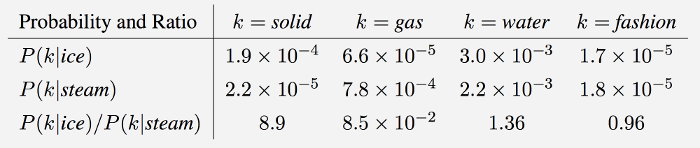

>ex1) solid라는 단어가 주어졌을 대 ice와 steam 벡터 사이의 내적값이 8.9가 되도록 하자는 것.<br>
>ex2) 마찬가지로, gas가 주어졌을 대 ice x steam은 0.0085가 되게끔 하는 것.<br>
>최종적으로 내적값이 1에서 멀수록 두 단어 간 관련이 있다는 것!<br>
>참고로 여기에서 solid, gas, water, fashion 단어도 index열에 들어갈 수 있다.<br>
>단어 상호 간 비율 정보를 말뭉치 전체를 놓고 한꺼번에 반영하게 되면 좀 더 정확한 단어 임베딩이 될 것이라고 생각한 게 GloVe 연구팀의 아이디어!<br>

In [2]:
from models.word_eval import WordEmbeddingEvaluator
model = WordEmbeddingEvaluator("data/word-embeddings/glove/glove.txt", method="glove",
                              dim=100, tokenizer_name="mecab")
model.most_similar("희망", topn=5)

[('행복', 0.7593905742455305),
 ('꿈', 0.7190308221412974),
 ('사랑', 0.6961724218705125),
 ('미래', 0.6795513141617532),
 ('세상', 0.672559694141116)]

### 4-6 Swivel

- Swivel ( Submatrix-Wise Vector Embedding Learner )

- GloVe와 다른점
> 1. PMI 행렬을 분해한다는 점에서 단어-문맥 행렬을 분해하는 GloVe와 다르다.
> 2. 목적 또한 PMI의 단점을 극복할 수 있도록 설계.

- 목적함수가 두 개 있음. why?
> 단어 i, j가 말뭉치의 특정 윈도우 내에서 동시에 등장한 적이 한 번도 없는 경우에 PMI는 음의 무한대로 발산하기 때문.<br>
> 이에 따른 목적함수2의 PMI* 는 단어 i, j의 동시등당횟수를 0 대신 1로 가정하고 계산한 PMI 값이다. 

In [2]:
from models.word_eval import WordEmbeddingEvaluator
model = WordEmbeddingEvaluator("data/word-embeddings/swivel/row_embedding.tsv",
                              method = "swivel", dim=100, tokenizer_name="mecab")
model.most_similar("희망", topn=5)

[('행복', 0.6618405915038258),
 ('소망', 0.6025673097538574),
 ('나눔', 0.589334003916026),
 ('우리', 0.5785493196324776),
 ('세상', 0.5728941226033926)]

### 4.7 어떤 단어 임베딩을 사용할 것인가

- 단어 간 통사적, 의미론적 즉, 실질적인 관계가 임베딩을 통해 얼마나 잘 표현되엇는지 정략적으로 평가하자.

- 단어 유사도 평가
> 일련의 단어 쌍을 미리 구성 후, 사람이 평가한 점수와 단어 벡터 간 코사인 유사도 사이의 상관관계를 계산해 단어 임베딩의 품질을 평가하는 방법.<br>
참고로 상관관계는 스피어만, 피어슨 두 가지를 사용한다.<br>
일단 예제에서는 예측 기반 임베딩 기법(Word2Vec, FastText)이 행렬 분해 방법(GloVe, Swivel)들보다 의미적 관계가 잘 녹아 있다.<br>

- 단어 유추 평가
> 갑과 을의 관계는 정과 병의 관계와 같다.<br>
> -> 갑 - 을 + 병 = 정<br>
> -> [갑 - 을 + 병]에 해당하는 벡터에 대해 코사인 유사도가 가장 높은 벡터에 해당하는 단어가 실제 [정]인지 코사인유사도로 파악.<br>
예제에서는 Word2Vec과 GloVe가 비교적 높은 점수를 갖고 있다.<br>

- 단어 임베딩 시각화 by Word2Vec  -------- t-SNE의 [참고사이트](https://ml-dnn.tistory.com/10)
> t-SNE(t-Stochastic Neighbor Embedding)를 적용해 고차원의 임베딩을 2차원으로 축소.
> t-SNE : 고차원의 원공간에 존재하는 벡터 x의 이웃 간의 거리를 최대한 보존하는 저차원 벡터 y를 학습하는 방법론.<br>
> 스토캐스틱(Stochastic) : 거리 정보를 확률적으로 나타내기 때문.<br>
> 원 공간의 데이터 확률 분포와 축소된 공간의 분포 사이의 차이를 최소화 하는 방향으로 벡터 공간을 조금씩 바꿔 나간다.<br>
> t-SNE는 주로 단어나 문장 임베딩을 시각화하는데 사용.<br>

In [4]:
from models.word_eval import WordEmbeddingEvaluator

model_name = "word2vec"

if model_name == "word2vec":
    model = WordEmbeddingEvaluator(
                vecs_txt_fname="data/word-embeddings/word2vec/word2vec",
                method="word2vec", dim=100, tokenizer_name="mecab")
elif model_name == "fasttext":
    model = WordEmbeddingEvaluator(
                vecs_txt_fname="data/word-embeddings/fasttext/fasttext.vec",
                vecs_bin_fname="data/word-embeddings/fasttext/fasttext.bin",
                method="fasttext", dim=100, tokenizer_name="mecab")
elif model_name == "glove":
    model = WordEmbeddingEvaluator(
                vecs_txt_fname="data/word-embeddings/glove/glove.txt",
                method="glove", dim=100, tokenizer_name="mecab")
elif model_name == "swivel":
    model = WordEmbeddingEvaluator(
                vecs_txt_fname="data/word-embeddings/swivel/row_embedding.tsv",
                method="swivel", dim=100, tokenizer_name="mecab")
else:
    print("model name error!")

In [5]:
model.word_sim_test("data/raw/kor_ws353.csv")

spearman corr: 0.5770993871014621 , pearson corr: 0.5956751142850295 , # of errors: 0


In [6]:
model.word_analogy_test("data/raw/kor_analogy_semantic.txt", verbose=False)

# of correct answer: 158 , # of data: 420 , # of errors: 0


### 단어 임베딩의 t-SNE 2차원 시각화

In [9]:
from models.word_eval import WordEmbeddingEvaluator
model = WordEmbeddingEvaluator("/notebooks/embedding/data/word-embeddings/word2vec/word2vec", method="word2vec", dim=100, tokenizer_name="mecab")

In [10]:
model.visualize_words("data/raw/kor_analogy_semantic.txt")

save @ /notebooks/embedding/words.png


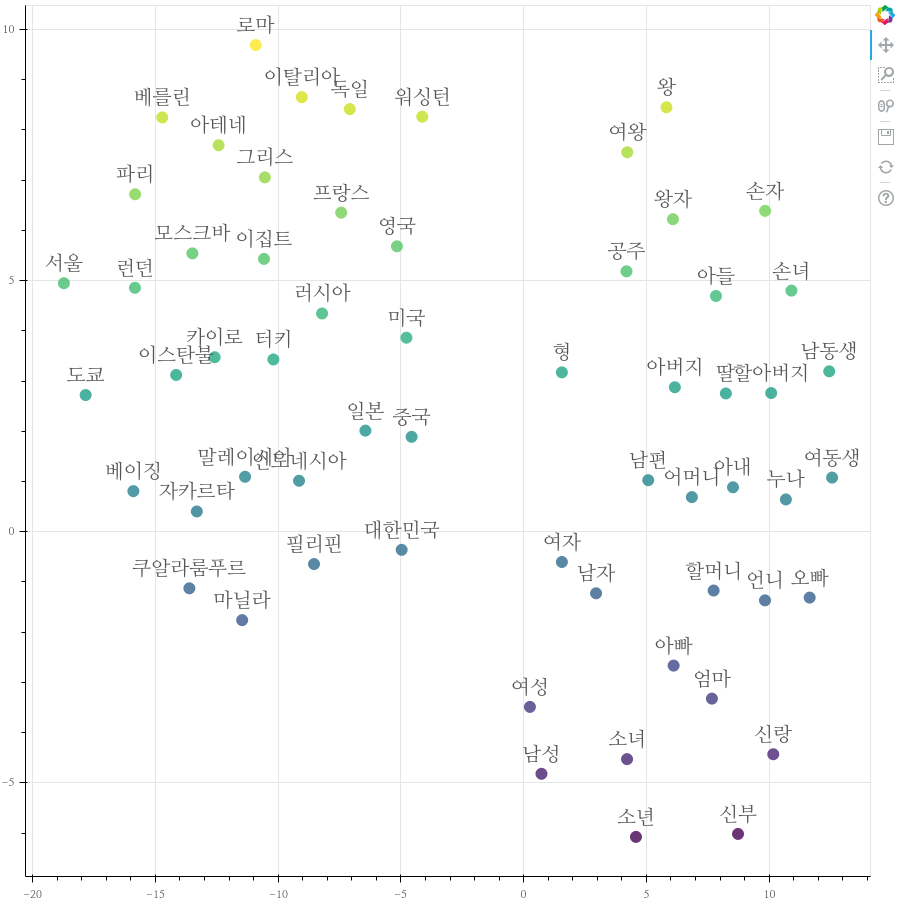

In [13]:
from PIL import Image
Image.open('words.png')

In [11]:
model.visualize_between_words("data/raw/kor_analogy_semantic.txt")

save @ /notebooks/embedding/between-words.png


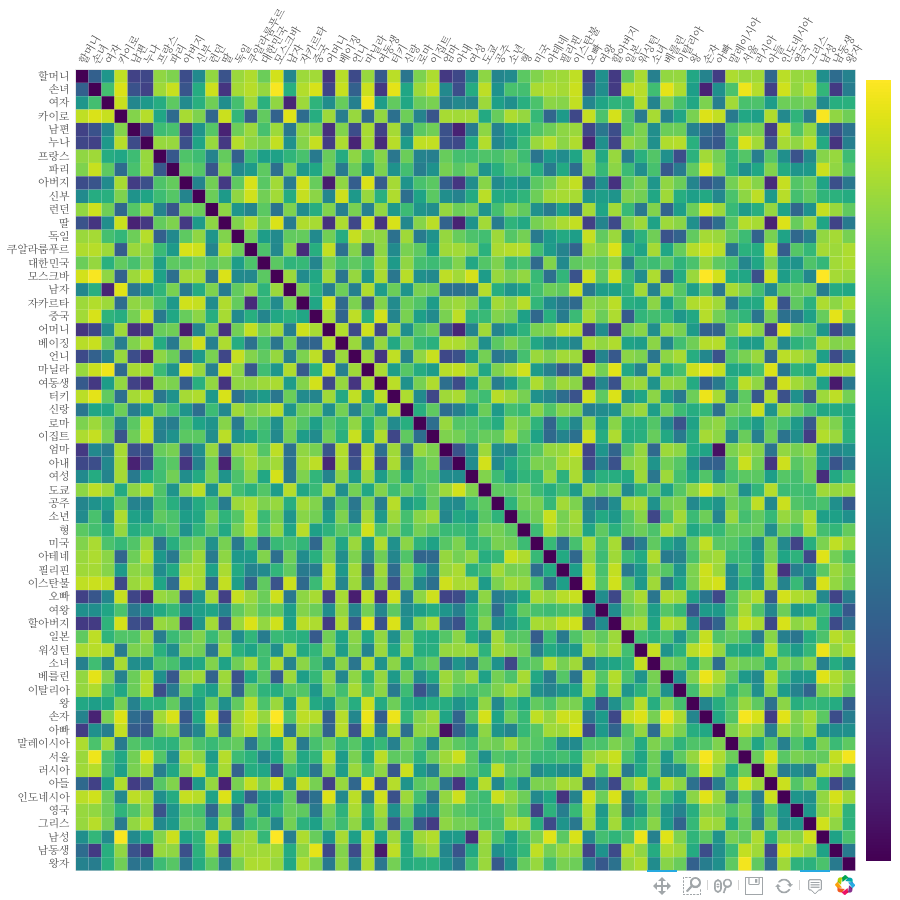

In [14]:
Image.open('between-words.png')